# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print(y_train[0])
print("X_test shape={}, number of elements:{}".format(X_test[0].shape, len(X_test[0])))
print(len(y_test))

41
X_test shape=(32, 32, 3), number of elements:32
12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
y:34799, n_classes:43
Mean:809.2790697674419, sigma:619.4201837045108, 28:480, 40:300, 2:2010, 38:1860, 1:1980


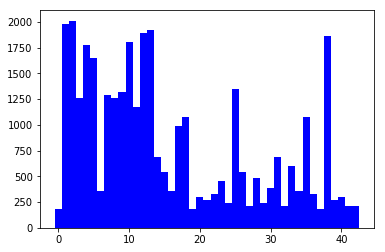

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import cv2
import numpy as np
from collections import Counter

# TODO: Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
class_set = set(y_train)
n_classes = len(class_set)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

def calc_class_dist(y): 
    count_trains = Counter(y)
    print("y:{}, n_classes:{}".format(len(y), n_classes))
    list_y = []
    for i in range(n_classes):
        list_y.append(count_trains[i])
    # Plot class distribution
    width = 1
    plt.bar(range(n_classes), list_y, width, color="blue")
    mean_train = np.mean(list_y)
    sigma_train = np.std(list_y)
    print("Mean:{}, sigma:{}, 28:{}, 40:{}, 2:{}, 38:{}, 1:{}".format(mean_train, sigma_train, count_trains[28], count_trains[40], count_trains[2], count_trains[38], count_trains[1]))
    #28,40,2,38,1
    return mean_train, count_trains, sigma_train

mean_train, count_train, sigma_train = calc_class_dist(y_train)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Image 14928, ClassId:38
Image 11245, ClassId:9
Image 33007, ClassId:2
Image 2237, ClassId:1
Image 4331, ClassId:40
Image 34701, ClassId:25
Image 5118, ClassId:16


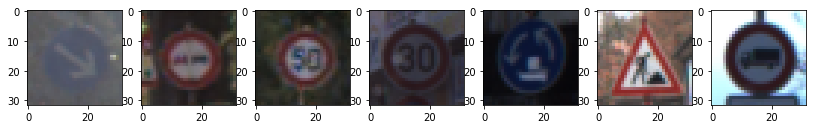

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

def draw_images(idx_list, img_list):
    n = len(idx_list)
    cols = 8
    rows = (n + cols - 1) / cols
    plt.figure(figsize=(cols * 2, rows * 2))
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        idx = idx_list[i]
        plt.imshow(img_list[idx].squeeze(), cmap="gray")
        
def draw_images2(img_list):
    n = len(img_list)
    cols = 8
    rows = (n + cols - 1) / cols
    plt.figure(figsize=(cols * 2, rows * 2))
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        plt.imshow(img_list[i].squeeze(), cmap="gray")

# print some training images
list = [42,0,16,9,25,28,40,2,38,1]
sample_list = []

n = 1
for idx in range(200):
    i = random.randint(0, n_train)
    if (y_train[i] in list):
        list.remove(y_train[i])
    else:
        continue
    print("Image {}, ClassId:{}".format(i, y_train[i]))
    n += 1
    sample_list.append(i)
    if n > 8:
        break;    

draw_images(sample_list, X_train)        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Brightening Images:[1.514996309785542, 1.1449909891708785, 1.5995091003522557, 0.8293550028142106, 1.7434588285076478, 1.2068098875047153, 1.6595063380616895, 0.9949043833832454]
y_train2:103316, n_classes:43
Counter({1: 7920, 13: 7680, 12: 7560, 5: 6600, 11: 4680, 18: 4320, 38: 4260, 39: 4260, 2: 4020, 17: 3960, 10: 3600, 4: 3540, 25: 2700, 9: 2640, 7: 2580, 3: 2520, 8: 2520, 15: 2160, 26: 2160, 35: 2160, 33: 1918, 34: 1918, 30: 1560, 14: 1380, 31: 1380, 22: 1320, 40: 1200, 36: 1020, 37: 1020, 19: 960, 20: 960, 28: 960, 23: 900, 6: 720, 16: 720, 21: 540, 24: 480, 29: 480, 27: 420, 32: 420, 41: 420, 42: 420, 0: 360})


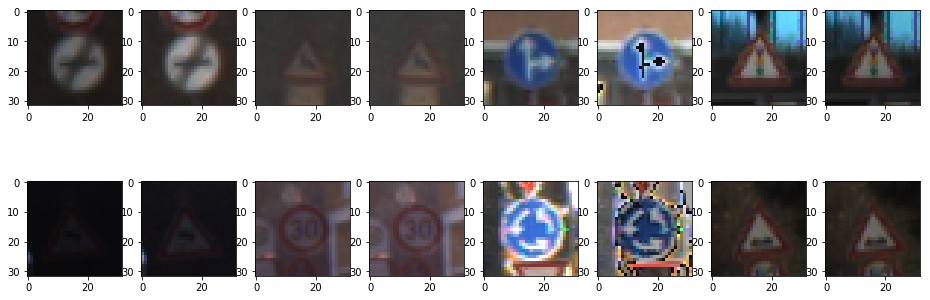

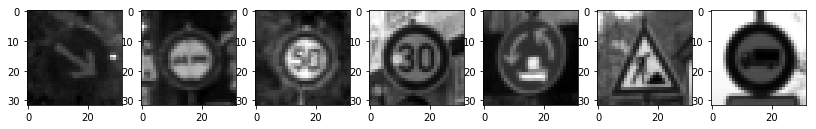

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import numpy as np
from skimage import exposure
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import cv2

def preprocess_dataset(X, y):
    grayX = []
    n = len(X)
    for i in range(n):
        # convert to gray
        img = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
        # normalize to keep it between 0.1 .. 0.9
        img1 = img.astype(np.float32) / 255.0 * 0.8 + 0.1
        grayX.append(img1)
    grayX = np.reshape(grayX, (-1,32,32,1))
    return grayX, y

def bright_images(images, y, intensity = 0.8):
    dbg_list = []
    dbg_count = 8
    brights = []
    list = []
    y0 = -1
    for image in images:
        image1 = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
        random_bright = intensity + np.random.uniform()
        image1[:,:,2] = image1[:,:,2]*random_bright
        image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2BGR)
        list.append(image1)
        if len(dbg_list) < dbg_count and y0 != y[len(list)-1]:
            y0 = y[len(list)-1]
            dbg_count += 1
            dbg_list.append(image)
            dbg_list.append(image1)
            brights.append(random_bright)
    print("Brightening Images:{}".format(brights))
    draw_images2(dbg_list)
    return list

def flip_extend(X, y):
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 13, 18, 22, 26, 30])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([12, 15, 17, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [20, 19], 
        [33, 34], 
        [34, 33], 
        [36, 37], 
        [37, 36], 
        [38, 39],
        [39, 38],   
    ])
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)

    dbg_count = 8
    horz = []
    vert = []
    cross = []
    both = []
    for c in range(n_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            n = len(X_extended)
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
            if (len(horz) < dbg_count):
                horz.append(X_extended[n])
                horz.append(X_extended[n+1])
            
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            n = len(X_extended)
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
            if (len(cross) < dbg_count):
                cross.append(X_extended[n])
                cross.append(X_extended[n+1])
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            n = len(X_extended)
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
            if (len(vert) < dbg_count):
                vert.append(X_extended[n])
                vert.append(X_extended[n+1])
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            n = len(X_extended)
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
            if (len(both) < dbg_count):
                both.append(X_extended[n])
                both.append(X_extended[n+1])
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    #print("Horz. Flippable #:{}".format(len(horz)))
    #draw_images2(horz)
    #print("Vert. Flippable #:{}".format(len(vert)))
    #draw_images2(vert)
    #print("Cross Flippable #:{}".format(len(cross)))
    #draw_images2(cross)
    #print("Both Flippable #:{}".format(len(both)))
    #draw_images2(both)
    return (X_extended, y_extended)

def rotate_img(X, intensity):
    result_x = []
    sz = len(X)
    mean1 = sigma_train + mean_train
    mean2 = sigma_train + mean1
    dbg_list = []
    dbg_count = 8
    for i in range(sz):
        n = 1
        x1 = X[i].copy()
        delta = 30. * intensity # scale using augmentation intensity
        x = random.uniform(-delta, delta)
        r_img = rotate(x1, x, mode = 'edge')
        if len(dbg_list) < dbg_count:
            dbg_list.append(r_img)
        result_x.append(r_img)
    print("Rotated Images")
    draw_images2(dbg_list)
    return result_x  

# brighten images
X_bright  = bright_images(X_train, y_train)
X_train = np.concatenate((X_train, X_bright), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)

# make train data gray 
X_train2, y_train2 = preprocess_dataset(X_train, y_train)
draw_images(sample_list, X_train2)   

# add flip
X_train2, y_train2 = flip_extend(X_train2, y_train2)
#print("Extended train X_train2 #: {}".format(len(X_train2))) 

X_valid2, y_valid2 = preprocess_dataset(X_valid, y_valid)
X_test2, y_test2 = preprocess_dataset(X_test, y_test)
    
print("y_train2:{}, n_classes:{}".format(len(y_train2), n_classes))
count_train = Counter(y_train2)
print(count_train)
    
# shuffle train data
X_train2, y_train2 = shuffle(X_train2, y_train2)


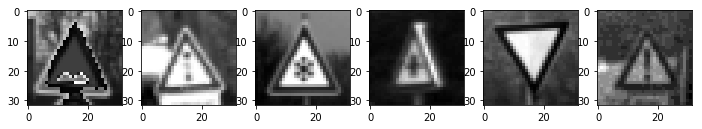

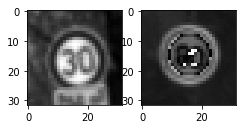

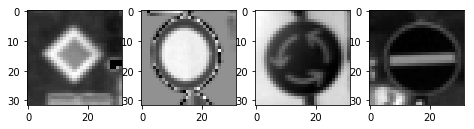

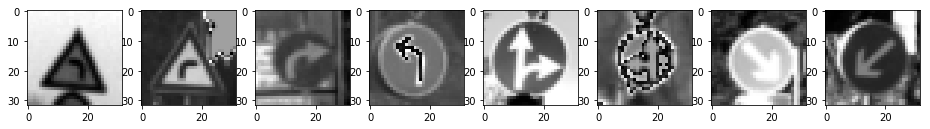

In [6]:
# show images flipable
self_flippable_horizontally = np.array([22, 26, 30, 11, 13, 18])
h_list = []
for c in self_flippable_horizontally:
    tmp = X_train2[y_train2 == c]
    h_list.append(tmp[0])
draw_images2(h_list)    
# Classes of signs that, when flipped vertically, should still be classified as the same class
self_flippable_vertically = np.array([1, 5])
v_list = []
for c in self_flippable_vertically:
    tmp = X_train2[y_train2 == c]
    v_list.append(tmp[0])
draw_images2(v_list)    
# Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
self_flippable_both = np.array([12, 15, 40, 17])
b_list = []
for c in self_flippable_both:
    tmp = X_train2[y_train2 == c]
    b_list.append(tmp[0])
draw_images2(b_list)    
# Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
cross_flippable = np.array([
        [19, 20],
        [20, 19], 
        [33, 34], 
        [34, 33], 
        [36, 37],
        [37, 36], 
        [38, 39],
        [39, 38],   
    ])
c_list = []
for c in cross_flippable:
    tmp = X_train2[y_train2 == c[0]]
    c_list.append(tmp[0])
draw_images2(c_list)    

Counter({1: 7920, 13: 7680, 12: 7560, 5: 6600, 11: 4680, 18: 4320, 38: 4260, 39: 4260, 2: 4020, 17: 3960, 10: 3600, 4: 3540, 25: 2700, 9: 2640, 7: 2580, 3: 2520, 8: 2520, 15: 2160, 26: 2160, 35: 2160, 33: 1918, 34: 1918, 30: 1560, 14: 1380, 31: 1380, 22: 1320, 40: 1200, 36: 1020, 37: 1020, 19: 960, 20: 960, 28: 960, 23: 900, 6: 720, 16: 720, 21: 540, 24: 480, 29: 480, 27: 420, 32: 420, 41: 420, 42: 420, 0: 360})
max_count:7920, X.shape[0]:103316
X_train2 #:425846, y_train2 #:425846
Counter({27: 9919, 32: 9919, 41: 9919, 42: 9919, 0: 9918, 6: 9911, 16: 9911, 14: 9906, 31: 9906, 40: 9904, 33: 9903, 34: 9903, 36: 9903, 37: 9903, 22: 9902, 1: 9900, 2: 9900, 3: 9900, 4: 9900, 5: 9900, 7: 9900, 8: 9900, 9: 9900, 10: 9900, 11: 9900, 12: 9900, 13: 9900, 15: 9900, 17: 9900, 18: 9900, 19: 9900, 20: 9900, 21: 9900, 23: 9900, 24: 9900, 25: 9900, 26: 9900, 28: 9900, 29: 9900, 30: 9900, 35: 9900, 38: 9900, 39: 9900})
X_train2 #:383261, X_valid2 #42585


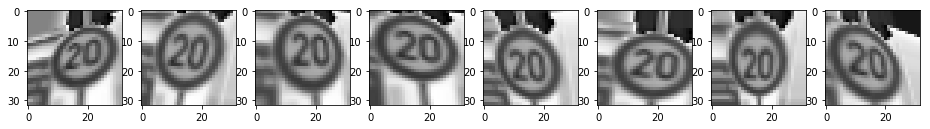

In [7]:
# Augment training dataset to make it balanced 
def apply_projection_transform(x, intensity = 0.75):
    image_size = x.shape[1]
    d = image_size * 0.3 * intensity
    
    tl_top = random.uniform(-d, d)     # Top left corner, top margin
    tl_left = random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = random.uniform(-d, d)     # Top right corner, top margin
    tr_right = random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = random.uniform(-d, d)   # Bottom right corner, right margin

    transform = ProjectiveTransform()
    transform.estimate(np.array((
            (tl_left, tl_top),
            (bl_left, image_size - bl_bottom),
            (image_size - br_right, image_size - br_bottom),
            (image_size - tr_right, tr_top)
        )), np.array((
            (0, 0),
            (0, image_size),
            (image_size, image_size),
            (image_size, 0)
        )))
    x = warp(x, transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')

    return x

def rotate_img2(x, intensity = 0.75):    
    delta = 30. * intensity # scale using augmentation intensity
    d = random.uniform(-delta, delta)
    r_img = rotate(x.copy(), d, mode = 'edge')
    return r_img  


from collections import Counter
cur_count = Counter(y_train2)
print(cur_count)
max_count = max(cur_count, key=cur_count.get)
max_count = cur_count[max_count]
print("max_count:{}, X.shape[0]:{}".format(max_count, X_train2.shape[0]))
c_list = [ i for i in range(n_classes)]
new_x = []
new_y = []
dbg_count = 0
for c in c_list:
    delta = max_count * 1.25 - cur_count[c]
    n = int((delta + cur_count[c] - 1) / cur_count[c])
    added = 0
    dbg_imgs = []
    dbg_imgs_limit = 8
    for idx in range(0, len(y_train2)):
        if y_train2[idx] == c:
            for i in range(n):
                added += 1
                if i % 3 == 1:
                    img = apply_projection_transform(X_train2[idx].copy())
                    if len(dbg_imgs) < dbg_imgs_limit:
                        dbg_imgs.append(img)
                else:
                    img = rotate_img2(X_train2[idx].copy())
                new_x.append(img)
                new_y.append(y_train2[idx])
            if (added >= delta):
                break
    if dbg_count < 2:
        draw_images2(dbg_imgs)
        dbg_count += 1
X_train2 = np.concatenate((X_train2, new_x), axis=0)
y_train2 = np.concatenate((y_train2, new_y), axis=0)    

print("X_train2 #:{}, y_train2 #:{}".format(len(X_train2), len(y_train2)))
print(Counter(y_train2))

# shuffle train data
X_train2, y_train2 = shuffle(X_train2, y_train2)

# split 10% for validation 
from sklearn.model_selection import train_test_split
X_train2,X_valid2,y_train2,y_valid2=train_test_split(X_train2,y_train2,test_size=0.1)

print("X_train2 #:{}, X_valid2 #{}".format(len(X_train2),len(X_valid2)))

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

#parameters
EPOCHS = 60
BATCH_SIZE = 128

def LeNet(x):
    mu = 0.0
    sigma = 0.1
    
    #layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
     # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 200 (updated from 120).
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 120 
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(84))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    
    # Dropout
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    # SOLUTION: Layer 6: Fully Connected. Input = 84. Output = nclass.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

#training rate
rate = 0.001

#training pipeline
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train2)
    
    print("Training...")
    print("# of X_train2:{}".format(len(X_train2)))
    print("# of y_train2:{}".format(len(y_train2)))
    for i in range(EPOCHS):
        X_train2, y_train2 = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train2[offset:end], y_train2[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.65})
            
        validation_accuracy = evaluate(X_valid2, y_valid2)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign3')
    print("Model saved")

#test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test2, y_test2)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Training...
# of X_train2:383261
# of y_train2:383261
EPOCH 1 ...
Validation Accuracy = 0.746

EPOCH 2 ...
Validation Accuracy = 0.819

EPOCH 3 ...
Validation Accuracy = 0.853

EPOCH 4 ...
Validation Accuracy = 0.867

EPOCH 5 ...
Validation Accuracy = 0.879

EPOCH 6 ...
Validation Accuracy = 0.883

EPOCH 7 ...
Validation Accuracy = 0.891

EPOCH 8 ...
Validation Accuracy = 0.886

EPOCH 9 ...
Validation Accuracy = 0.901

EPOCH 10 ...
Validation Accuracy = 0.906

EPOCH 11 ...
Validation Accuracy = 0.903

EPOCH 12 ...
Validation Accuracy = 0.910

EPOCH 13 ...
Validation Accuracy = 0.911

EPOCH 14 ...
Validation Accuracy = 0.914

EPOCH 15 ...
Validation Accuracy = 0.914

EPOCH 16 ...
Validation Accuracy = 0.911

EPOCH 17 ...
Validation Accuracy = 0.916

EPOCH 18 ...
Validation Accuracy = 0.918

EPOCH 19 ...
Validation Accuracy = 0.920

EPOCH 20 ...
Validation Accuracy = 0.919

EPOCH 21 ...
Validation Accuracy = 0.921

EPOCH 22 ...
Validation Accuracy = 0.919

EPOCH 23 ...
Validation Accurac

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

image shape:(32, 32, 1)
image shape:(32, 32, 1)
image shape:(32, 32, 1)
image shape:(32, 32, 1)
image shape:(32, 32, 1)


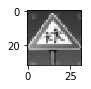

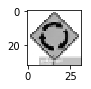

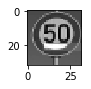

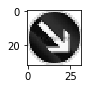

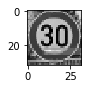

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#test the model
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np

#web_img_names = ["data/img_11125_id_9.jpg", "data/img_17591_id_10.jpg", "data/img_27316_id_28.jpg", "data/img_22060_id_13.jpg", "data/img_31746_id_2.jpg", "data/img_30137_id_15.jpg", "data/img_27620_id_12.jpg", "data/img_3829_id_1.jpg","data/img_6889_id_4.jpg","data/img_12632_id_5.jpg"]
#web_img_labels = [9,10,28,13,2,15,12,1,4,5]

web_img_names = ["WebImg/children_28.jpg", "WebImg/round_about_40.jpg", "WebImg/speed_limit_50_2.jpg", "WebImg/keep_right_38.jpg", "WebImg/speed_30_1.jpg"]
web_img_labels = [28,40,2,38,1]

web_imgs = []
for img in web_img_names:
    image = cv2.imread(img)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #normalize
    gray = gray.astype(np.float32) / 255.0 * 0.8 + 0.1
    plt.figure(figsize=(1,1))
    plt.imshow(gray, cmap="gray")
    web_imgs.append(gray)
    
web_imgs = np.reshape(web_imgs, (-1,32,32,1))
for img in web_imgs:
    print("image shape:{}".format(img.shape))

### Predict the Sign Type for Each Image

In [16]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf
#logits_web = LeNet(web_imgs.astype(np.float32))
temp = tf.nn.softmax(logits,dim =0,name = None)
pred = tf.argmax(temp, 1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(web_imgs, web_img_labels)
    print("Web Test Accuracy = {:.3f}".format(test_accuracy))
    print(sess.run(pred, feed_dict = {x:web_imgs, keep_prob:1}))
    a = sess.run(temp, feed_dict = {x:web_imgs, keep_prob:1})
    top_k = sess.run(tf.nn.top_k(tf.constant(a), k=5))
    print(top_k)

Web Test Accuracy = 0.800
[28 15  0 17  1]
TopKV2(values=array([[  1.00000000e+00,   9.99999762e-01,   9.99977946e-01,
          9.96698320e-01,   9.94899690e-01],
       [  9.99999642e-01,   9.94220614e-01,   9.92505312e-01,
          9.73717093e-01,   3.04859161e-01],
       [  9.99982357e-01,   9.99935031e-01,   9.99909163e-01,
          9.99834657e-01,   9.99721706e-01],
       [  1.00000000e+00,   9.99999046e-01,   9.99902248e-01,
          9.99850988e-01,   9.99714553e-01],
       [  9.99807656e-01,   1.11927809e-02,   5.90016542e-04,
          2.27780372e-04,   7.45858233e-06]], dtype=float32), indices=array([[28, 27, 24, 25, 11],
       [15, 12, 32, 41,  9],
       [ 0,  3,  8,  6,  4],
       [17, 38, 34, 26, 42],
       [ 1,  5,  2,  4,  0]], dtype=int32))


### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

    

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


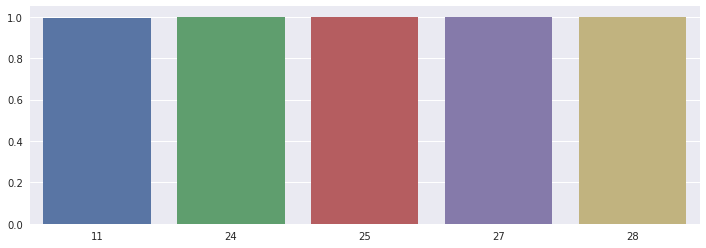

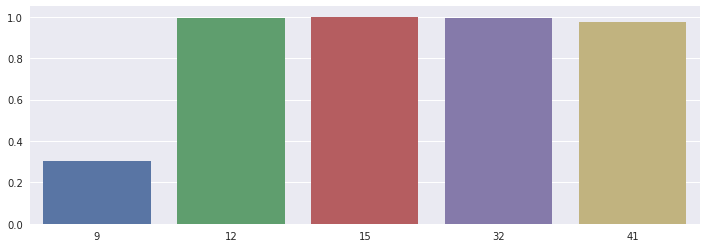

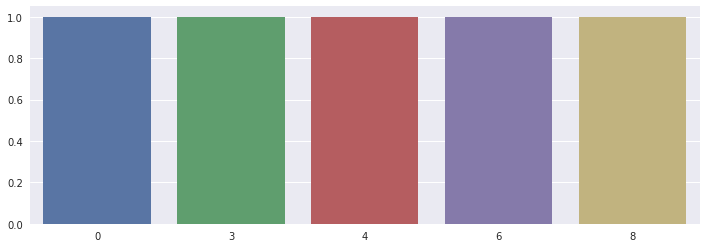

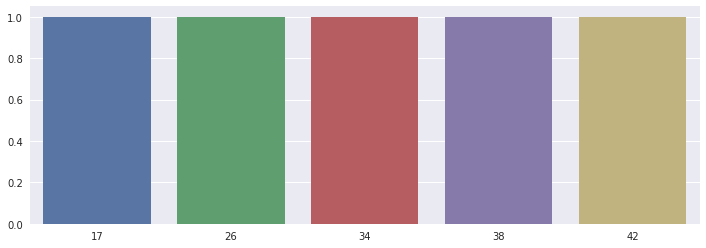

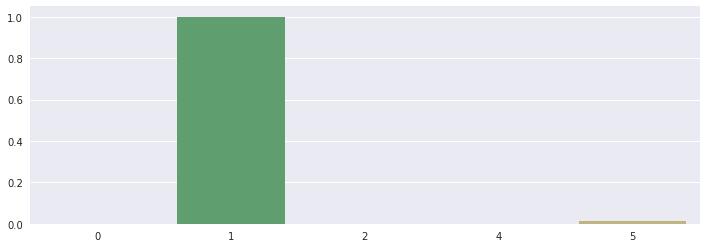

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import seaborn as sns
for i in range(5):
    fig = plt.figure(figsize=(12,4))
    sns.barplot(x=top_k[1][i], y=top_k[0][i])
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


web_imgs shape:(32, 32, 1) 


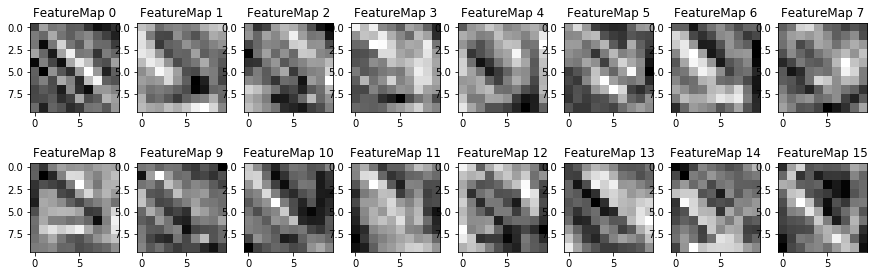

In [14]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
 

#parameters
mu = 0.0
sigma = 0.1

#layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
# SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

#conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
print("web_imgs shape:{} ".format(web_imgs[3].shape))
data = [web_imgs[3].astype(np.float32)]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    tf_conv2 = sess.run(conv2, feed_dict={x: data})
    outputFeatureMap(data, conv2)
    
    

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


Answer: First, it learns line and edge of objects. Then it proceeds to object/pattern. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 